### MultiLayer MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.examples.tutorials.mnist.input_data as input_data

# Load mnist data set (train, validation, test)
mnist = input_data.read_data_sets("/tmp/MNIST_data", one_hot=True)

Extracting /tmp/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/t10k-labels-idx1-ubyte.gz


### Config params

In [12]:
# How fast our model learns (originally 0.1)
learning_rate = 0.1
# The number of sample elements in each batch we choose (original was 100)
batch_size = 100
# Number of neurons in the hidden layers (originally 32)
n_hidden_1 = 64
n_hidden_2 = 64 
# Main loop iterations (original 50)
training_epochs = 3 
# Image size in pixels
n_input = 784
# The different digits of the output 0-9. We should not change that unless we change the model
n_classes = 10

### Problem Definition in TF

In [13]:
# Input
with tf.name_scope("Input"):
    X = tf.placeholder(tf.float32, shape=[None, n_input], name="input_X")
    Y = tf.placeholder(tf.float32, shape=[None, n_classes], name="labels_Y")

# Weights and biases for hidden layers
with tf.name_scope("Hidden_1"):
    W2 = tf.Variable(tf.random_normal([n_input, n_hidden_1]), name="Weights")
    b2 = tf.Variable(tf.random_normal([1, n_hidden_1]), name="biases")
    layer_2 = tf.nn.sigmoid(tf.matmul(X, W2) + b2)

# Weights and biases for hidden layers
with tf.name_scope("Hidden_2"):
    W3 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]), name="Weights")
    b3 = tf.Variable(tf.random_normal([1, n_hidden_2]), name="biases")
    layer_3 = tf.nn.sigmoid(tf.matmul(layer_2, W3) + b3)

# Output layer
with tf.name_scope("Output"):
    W4 = tf.Variable(tf.random_normal([n_hidden_2, n_classes]), name="Weights")
    b4 = tf.Variable(tf.random_normal([1, n_classes]), name="biases")
    output_layer = tf.matmul(layer_3, W4) + b4
    yHat = tf.nn.softmax(output_layer)

# Cost
with tf.name_scope("Cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=Y))
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(yHat, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Optimizer
with tf.name_scope("Optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_step = optimizer.minimize(cost)

### Write the Graph to Show it in TensorBoard
[Tensorboard](http://localhost:6006)

In [14]:
writer = tf.summary.FileWriter("/Users/fperez/dev/tensorboard.out", graph=tf.get_default_graph())
writer.close()

### Training the Model

In [15]:
# Create session and train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    
    total_batches = int(mnist.train.num_examples / batch_size)
    print('Total Batches: ', total_batches)
    for batch in range(total_batches):
    
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        cv, _, = sess.run([cost, train_step], feed_dict={X:batch_xs, Y:batch_ys})
        a = sess.run([accuracy], feed_dict={X:mnist.test.images, Y:mnist.test.labels})
        print (epoch, batch, cv, a)



('Total Batches: ', 550)
(0, 0, 4.2243361, [0.115])
(0, 1, 4.4755039, [0.1153])
(0, 2, 3.5242906, [0.1164])
(0, 3, 3.3856254, [0.1177])
(0, 4, 3.3802428, [0.121])
(0, 5, 3.3972862, [0.127])
(0, 6, 3.1820679, [0.1344])
(0, 7, 3.0524316, [0.14120001])
(0, 8, 3.2338722, [0.1473])
(0, 9, 3.2005038, [0.1498])
(0, 10, 3.0387566, [0.15350001])
(0, 11, 3.0967607, [0.1532])
(0, 12, 3.0022278, [0.1541])
(0, 13, 2.9155822, [0.15360001])
(0, 14, 2.7710056, [0.1539])
(0, 15, 2.6339724, [0.1539])
(0, 16, 2.6237116, [0.15350001])
(0, 17, 2.7424786, [0.15270001])
(0, 18, 2.9381747, [0.15260001])
(0, 19, 2.5466611, [0.15279999])
(0, 20, 2.7978175, [0.1505])
(0, 21, 2.651015, [0.1515])
(0, 22, 2.5817442, [0.148])
(0, 23, 2.6121769, [0.1479])
(0, 24, 2.7591379, [0.14569999])
(0, 25, 2.5818322, [0.1418])
(0, 26, 2.5544503, [0.1428])
(0, 27, 2.4149985, [0.1461])
(0, 28, 2.5291798, [0.1455])
(0, 29, 2.467294, [0.1441])
(0, 30, 2.6158619, [0.1454])
(0, 31, 2.5142124, [0.1473])
(0, 32, 2.5530818, [0.1463])
(0

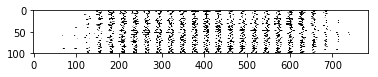

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


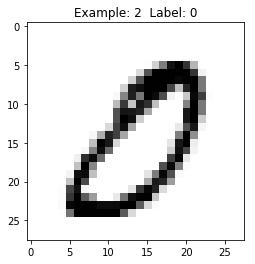

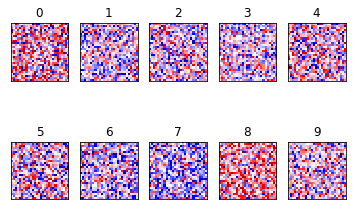

ValueError: total size of new array must be unchanged

In [16]:
def display_digit(num):
    print(batch_ys[num])
    label = batch_ys[num].argmax(axis=0)
    image = batch_xs[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = batch_xs[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, batch_xs[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_mult_flat(0, batch_size)
display_digit(2)

for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W2)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W3)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([8,8]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W4)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([8,8]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

### 3 Epochs (Batch size 100)
1. LR=0.1 -> (2, 549, 0.7950049, [0.74290001])
2. LR=0.5 -> (2, 549, 0.42935318, [0.87690002])
3. LR=0.7 -> (2, 549, 0.35030693, [0.8858])

### 3 Epochs (Batch size 1000)
1. LR=0.1 -> (2, 54, 1.7363929, [0.414])
2. LR=0.5 -> (2, 54, 1.0859478, [0.67879999])
3. LR=0.7 -> (2, 54, 0.88065434, [0.73680001])

### 3 Epochs & Double number of neurons (64)! (Batch size 1000)
1. LR=0.1 -> (2, 54, 1.5896723, [0.50370002])
2. LR=0.5 -> (2, 54, 0.90300792, [0.7277])
3. LR=0.7 -> (2, 54, 0.81213766, [0.75580001])
4. LR=0.7 -> (2, 549, 0.19249596, [0.90359998]) <- With batch size = 100
5. LR=0.9 -> (2, 549, 0.23104374, [0.91189998]) <- With batch size = 100

### 6 Epochs (Batch size 100) Double the epoch!
1. LR=0.1 -> (5, 549, 0.5226053, [0.82660002])
2. LR=0.5 -> (5, 549, 0.29778332, [0.90130001])
3. LR=0.7 -> (5, 549, 0.19753177, [0.91210002])

### 6 Epochs (Batch size 1000) Double the epoch!
1. LR=0.1 -> (5, 54, 1.624416, [0.4366])
2. LR=0.5 -> (5, 54, 0.76716441, [0.77109998])
3. LR=0.7 -> (5, 54, 0.71083361, [0.78250003])

In [ ]:
sess.close()